# Задача классификации



**Для начала мы разберем все алгоритмы для задачи классификации**

## 1. Выбор начальных условий

###  а. Набор данных

Данные https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior/code
Необходимо предсказать кто является возможными неплательщиками по потребительскому кредитному продукту. У нас есть данные об историческом поведении клиентов. Поэтому мы должны предсказать кто является рискованным клиентом, а кто нет

In [1]:
!pip install kaggle

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=28b09597a25f74d186ecf886f835524bcefdf1adc3b8e2af277ca019ac4d018f
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [2]:
!pip install opendatasets
!pip install pandas

In [3]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior/data") 

Skipping, found downloaded files in ".\loan-prediction-based-on-customer-behavior" (use force=True to force download)


In [5]:
import pandas as pd

data = pd.read_csv('loan-prediction-based-on-customer-behavior/Training Data.csv')
data.head(15)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


### b. Метрики качества

В качестве метри для задачи классификации будем использовать Accuracy = (TP + TN) / (TP + TN + FP + FN) и F1-score = 2 * (presicion * recall) /  (presicion + recall)

Данные метрики подойдут, поскольку в данном датасете представлена задача бинарной классификации со сбалансированными данными

# 2. Создание бейзлайна и оценка качества

## a. KNN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

In [49]:
def print_evaluation(y_test, y_pred):
    print("Accuracy score")
    print(accuracy_score(y_test, y_pred))
    print()
    #print("F1 score")
    print(classification_report(y_test, y_pred))

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



In [50]:

X = data.drop(['Id', 'Risk_Flag'], axis=1)
y = data['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)
print_evaluation(y_test, y_pred)

Accuracy score
0.8890277777777778

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44147
           1       0.56      0.48      0.52      6253

    accuracy                           0.89     50400
   macro avg       0.74      0.71      0.73     50400
weighted avg       0.88      0.89      0.89     50400



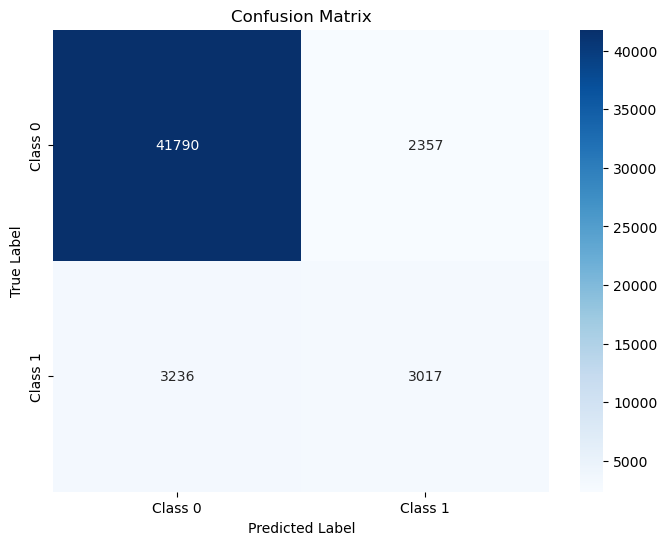

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## b. Логистическая и линейная регрессия

In [31]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def print_evaluation2(y_test, y_pred):
    print("MSE score")
    print(mean_squared_error(y_test, y_pred))
    print("Accuracy score")
    print(accuracy_score(y_test, y_pred))

In [32]:
model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train,y_train)

y_pred2 = model_2.predict(X_test)
print_evaluation2(y_test, y_pred2)

MSE score
0.12406746031746031
Accuracy score
0.8759325396825397


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
model_3 = LinearRegression()
model_3.fit(X_train,y_train)

y_pred3 = model_3.predict(X_test)
print("MSE score")
print(mean_squared_error(y_test, y_pred))

MSE score
0.10829363367153573


## c. Решающее дерево

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model_4 = DecisionTreeClassifier(random_state=42)
model_4.fit(X_train,y_train)

y_pred4 = model_4.predict(X_test)
print_evaluation(y_test, y_pred4)

Accuracy score
0.8800396825396826

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44147
           1       0.51      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400



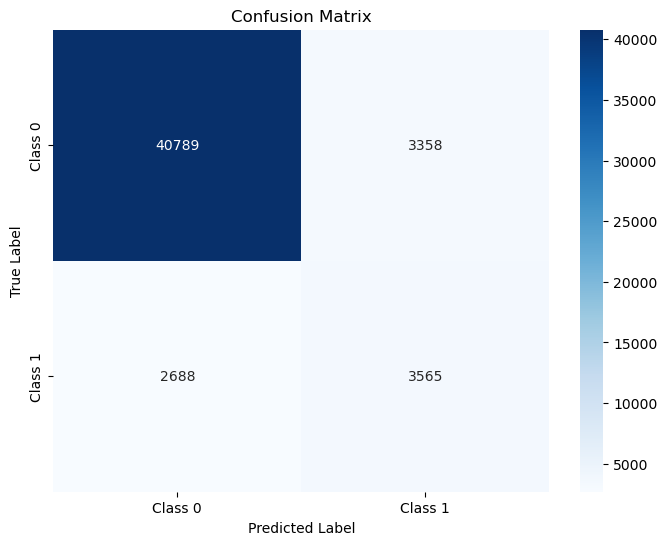

In [39]:
cm = confusion_matrix(y_test, y_pred4)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## d. Случайный лес

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
model_5 = RandomForestClassifier(n_estimators=100, random_state=42)
model_5.fit(X_train,y_train)

y_pred5 = model_5.predict(X_test)
print_evaluation(y_test, y_pred5)

Accuracy score
0.8984920634920635

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



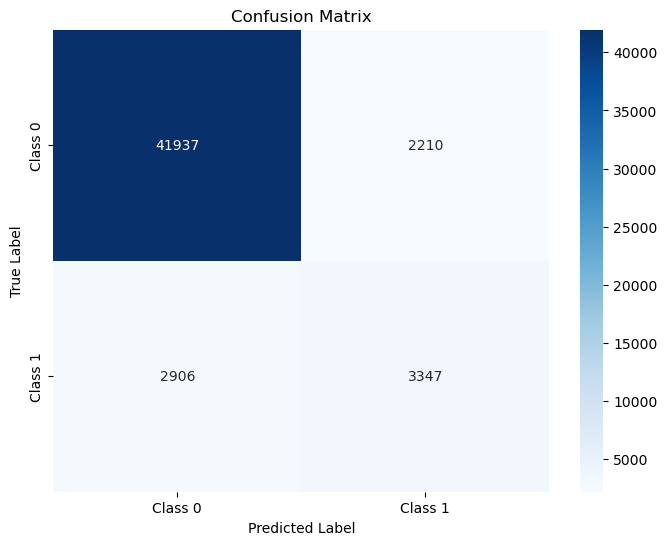

In [42]:
cm = confusion_matrix(y_test, y_pred5)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## e. Градиентный бустинг

In [53]:
model_6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_6.fit(X_train,y_train)

y_pred6 = model_6.predict(X_test)
print_evaluation(y_test, y_pred6)

Accuracy score
0.8761309523809524

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.78      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.83      0.50      0.47     50400
weighted avg       0.86      0.88      0.82     50400



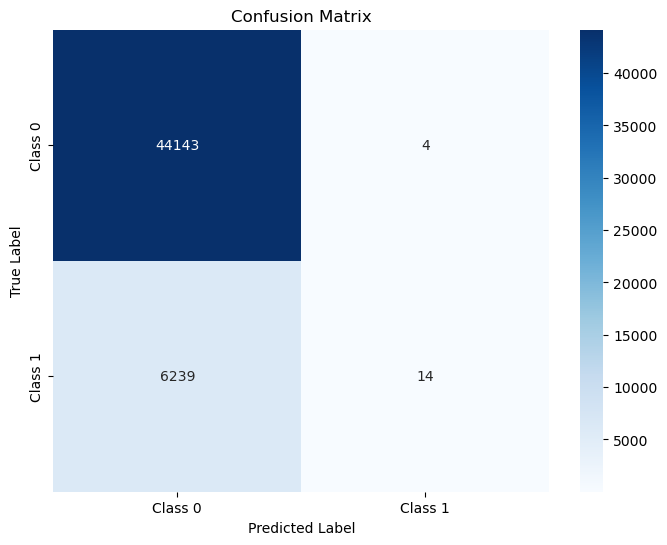

In [54]:
cm = confusion_matrix(y_test, y_pred6)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 3. Улучшение бейзлайна

Выполним препроцессинг данных, чтобы улучшить бейзлайн

In [55]:
df = pd.read_csv('loan-prediction-based-on-customer-behavior/Training Data.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


Исследуем датасет и визуализируем некоторую информацию

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [57]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_67248\351242229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Age"]);


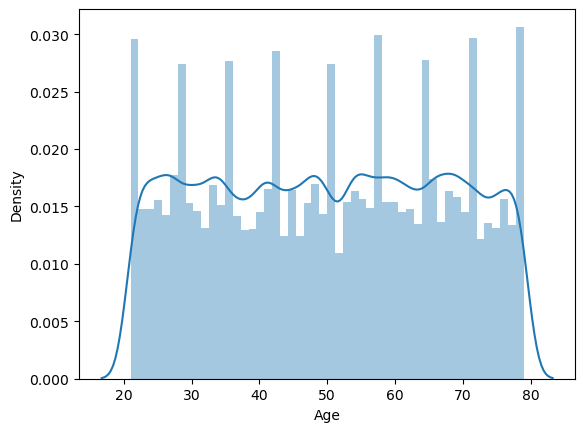

In [58]:
sns.distplot(a=df["Age"]);

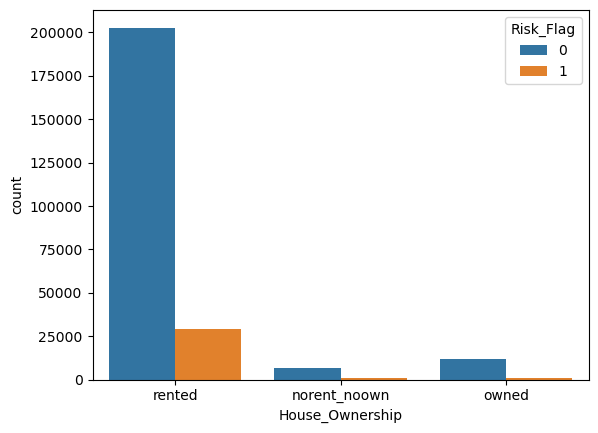

In [59]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

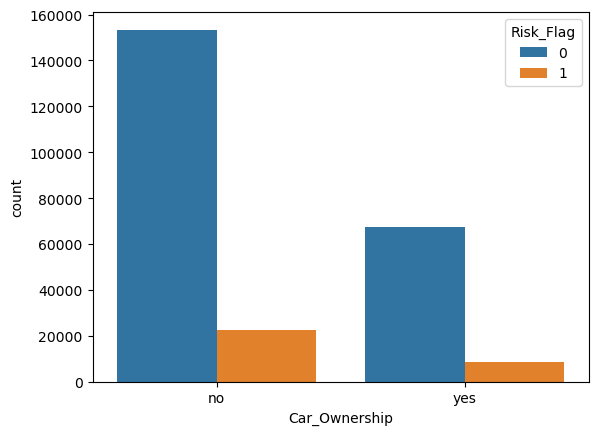

In [60]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df);

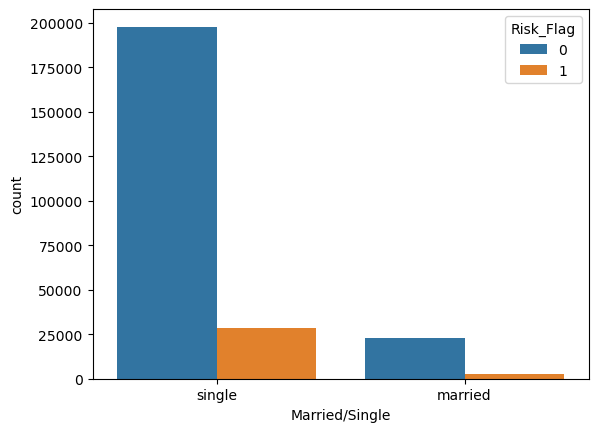

In [61]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

C:\Users\Asus\AppData\Local\Temp\ipykernel_67248\4075653490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Income"]);


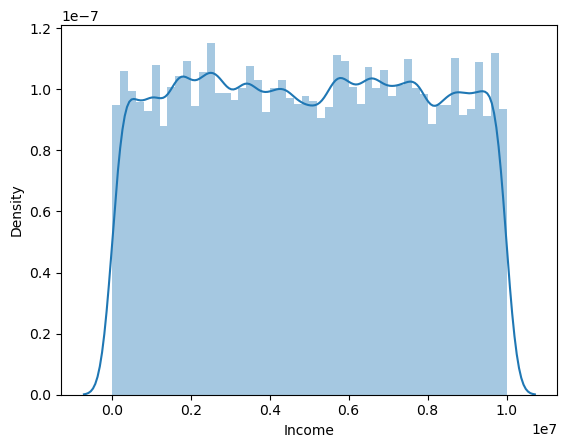

In [62]:
sns.distplot(a=df["Income"]);

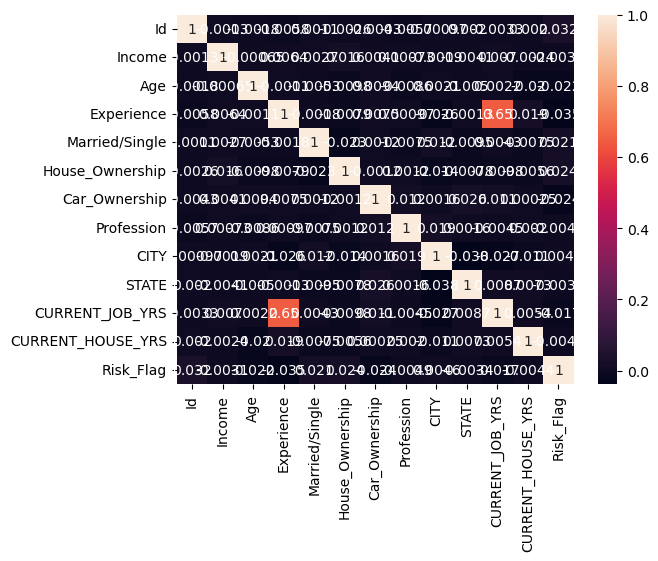

In [70]:
sns.heatmap(data.corr(), annot=True);

In [64]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


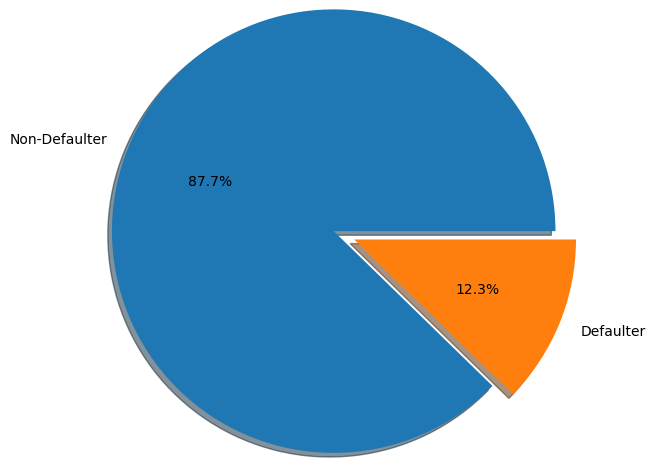

In [65]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

### После визуализации данных можно увидеть ряд моментов:
Класс 0 представляет 88,00% набора данных, а класс 1 — только 12,00%. Классы не уровновешены, нам нужно решить эту проблему
В наборах данных нет выбросов. Но нам нужно масштабировать возраст и доход
Сильная корреляция между Experience и CURRENT_JOB_YRS 
Семейное положение, налиие машины, владение домом представляют собой категориальные фичи, которые можно бинаризовать или закодировать с помощью one-hot-encoding



In [66]:
features = ["CURRENT_JOB_YRS","Experience"]

df_for_pca = df[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [68]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [69]:
df1 = pd.concat([df,df_pca],axis=1)
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


In [71]:
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df1[col])

In [72]:
df2 = pd.get_dummies(df1, columns = ["House_Ownership"])
df2.drop(["Id"],axis=1,inplace=True)

In [74]:
X = df2.drop(['Risk_Flag'],axis=1)
y = df2.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,PC1,PC2,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
157193,5421595,45,4,1,0,0,102,10,4,12,-1.169251,-0.264246,False,False,True
125307,7585042,53,15,1,0,35,252,7,3,13,-0.067332,1.225442,False,False,True
102075,3319389,35,5,1,1,17,174,19,5,11,-0.857566,-0.340330,False,False,True
235132,3880165,33,1,1,0,3,96,25,1,11,-2.104305,-0.035994,False,False,True
13524,2729670,23,10,1,0,3,264,23,10,13,0.700858,-0.720751,False,False,True


In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

### Теперь данные готовы для применения модели машинного обучения

### KNN

In [82]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)

print_evaluation(y_test, y_pred)

Accuracy score
0.859537037037037

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.44      0.57      0.50      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.73      0.71     75600
weighted avg       0.88      0.86      0.87     75600



### Логистическая и линейная регрессия

In [84]:
model_2 = LogisticRegression(max_iter = 500000)
model_2.fit(X_train,y_train)

y_pred2 = model_2.predict(X_test)
print_evaluation2(y_test, y_pred2)

MSE score
0.12251322751322752
Accuracy score
0.8774867724867725


In [85]:
model_3 = LinearRegression()
model_3.fit(X_res,y_res)

y_pred3 = model_3.predict(X_test)
print("MSE score")
print(mean_squared_error(y_test, y_pred3))

MSE score
0.21646516176969344


### Решающее дерево

In [86]:
model_4 = DecisionTreeClassifier(criterion="entropy",random_state=420)
model_4.fit(X_res, y_res)
y_pred4 = model_4.predict(X_test)
print_evaluation(y_test, y_pred4)

Accuracy score
0.8671957671957672

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66338
           1       0.48      0.85      0.61      9262

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.77     75600
weighted avg       0.92      0.87      0.88     75600



### Случайный лес

In [87]:
model_5 = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
model_5.fit(X_res, y_res)
y_pred5 = model_5.predict(X_test)
print_evaluation(y_test, y_pred5)

Accuracy score
0.8832936507936507

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.52      0.81      0.63      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



### Градиентный бустинг

In [90]:
model_6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_6.fit(X_res, y_res)
y_pred6 = model.predict(X_test)
print_evaluation(y_test, y_pred6)

Accuracy score
0.5687698412698413

              precision    recall  f1-score   support

           0       0.88      0.59      0.70     66338
           1       0.13      0.45      0.20      9262

    accuracy                           0.57     75600
   macro avg       0.51      0.52      0.45     75600
weighted avg       0.79      0.57      0.64     75600



### Как видно из сравнения результатов, все модели, за исключением градиентного бустинга, показали одинаковые или лучшие точности на улучшенным бейзлайне, а это значит, что препроцессинг оказался удачным

# 4. Имплементация алгоритмов машинного обучения

In [139]:
data = pd.read_csv('loan-prediction-based-on-customer-behavior/Training Data.csv')
data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [140]:
label_encoders = {}
for column in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [219]:
X = data.drop(['Id', 'Risk_Flag'], axis=1)
y = data['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#print_evaluation(y_test, y_pred)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(239400, 11) (12600, 11)
(239400,) (12600,)


In [220]:
X_train_small = X_train.sample(frac=0.05, random_state=42)
y_train_small = y_train.loc[X_train_small.index]
X_train_small

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
69192,667691,40,20,0,2,0,35,208,0,13,13
59685,3148837,37,17,1,2,1,40,42,2,13,13
118918,2966871,78,7,0,2,0,32,229,2,3,11
101913,1951736,72,12,1,2,1,7,40,17,11,11
115009,140516,29,19,1,2,0,39,311,22,14,10
...,...,...,...,...,...,...,...,...,...,...,...
137769,4324181,21,11,1,2,0,3,245,23,11,11
31328,7622856,59,5,1,1,0,30,291,22,5,11
99365,1080039,66,18,1,2,0,40,45,28,11,10
102218,1464792,65,10,1,1,0,48,107,13,10,12


### KNN

In [201]:
from scipy.spatial import distance

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        # Используем scipy для ускорения вычислений
        for x in X.values:
            distances = distance.cdist(self.X_train.values, [x], metric='euclidean').ravel()
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train.iloc[k_indices]
            most_common = k_labels.mode()[0]
            predictions.append(most_common)
        return np.array(predictions)


In [163]:
knn = KNNClassifier(k=5)
knn.fit(X_train_small, y_train_small)
y_pred = knn.predict(X_test)

In [164]:
print_evaluation(y_test, y_pred)

Accuracy score
0.8593650793650793

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11051
           1       0.31      0.12      0.17      1549

    accuracy                           0.86     12600
   macro avg       0.60      0.54      0.55     12600
weighted avg       0.82      0.86      0.83     12600



### Логистическая и линейная регрессия

In [168]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
       return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.num_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

In [171]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_small)

In [172]:
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y_train_small)
y_pred = logistic_model.predict(X_test)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [173]:
class LinearRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.num_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [174]:
X_test_scaled = scaler.fit_transform(X_test)

In [175]:
linear_model = LogisticRegression()
linear_model.fit(X_scaled, y_train_small)
y_pred = linear_model.predict(X_test_scaled)
print("Linear Regression MSE:")
print(mean_squared_error(y_test, y_pred))

Linear Regression MSE:
0.12293650793650794


### Решающее дерево

In [176]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def _gini(self, y):
        # Считаем Gini impurity
        classes = np.unique(y)
        gini = 1.0
        for cls in classes:
            p_cls = np.sum(y == cls) / len(y)
            gini -= p_cls**2
        return gini

    def _split(self, X, y, feature, threshold):
        # Разделяем данные по признаку и порогу
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def _best_split(self, X, y):
        # Ищем лучший признак и порог для разбиения
        n_samples, n_features = X.shape
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                _, _, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gini = (len(y_left) / n_samples) * self._gini(y_left) + \
                       (len(y_right) / n_samples) * self._gini(y_right)
                
                if gini < best_gini:
                    best_gini = gini
                    best_feature, best_threshold = feature, threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth):
        # Рекурсивно строим дерево
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return {'value': np.bincount(y).argmax()}

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {'value': np.bincount(y).argmax()}

        left_X, right_X, left_y, right_y = self._split(X, y, feature, threshold)
        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(left_X, left_y, depth + 1),
            'right': self._build_tree(right_X, right_y, depth + 1)
        }

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)

    def _predict_one(self, x, tree):
        # Предсказываем для одного примера
        if 'value' in tree:
            return tree['value']
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_one(x, tree['left'])
        else:
            return self._predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

In [177]:
tree_model = DecisionTree()
tree_model.fit(X_scaled, y_train_small)
y_pred = tree_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8732539682539683

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11051
           1       0.19      0.01      0.02      1549

    accuracy                           0.87     12600
   macro avg       0.53      0.50      0.48     12600
weighted avg       0.79      0.87      0.82     12600



### Случайный лес

In [178]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        idxs = np.random.choice(len(X), size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(tree_preds[:, i]).argmax() for i in range(X.shape[0])])


In [188]:
X_train_array = X_scaled
y_train_array = y_train_small.values

X_train = X_train_array.astype(np.float64)
y_train = y_train_array.astype(int)     



In [189]:
forest_model = RandomForest()
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Градиентный бустинг

In [181]:
class GradientBoosting:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        residual = y

        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            predictions = tree.predict(X)
            residual -= self.learning_rate * predictions
            self.trees.append(tree)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return np.round(pred)


In [182]:
gradient_model = GradientBoosting()
gradient_model.fit(X_scaled, y_train_small)
y_pred = gradient_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 ### Вывод: как можно убедиться по результам метрик , что моя собственная имплементация алгоритмов обучения показывает их значения, не хуже чем при использовании моделей из sklearn, а иногда такая имплементация бывает более наглядной

Применим написаные выше модели к данным, которые прошли препроцессинг (из улучшенного бейзлайна)

In [202]:
df2.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,1,0,33,251,13,3,13,0,-1.480935,-0.188162,False,False,True
1,7574516,40,10,1,0,43,227,14,9,13,0,0.506973,-0.526866,False,False,True
2,3991815,66,4,0,0,47,8,12,4,10,0,-1.169251,-0.264246,False,False,True
3,6256451,41,2,1,1,43,54,17,2,12,1,-1.792620,-0.112078,False,False,True
4,5768871,47,11,1,0,11,296,22,3,14,1,-0.538533,0.754240,False,False,True


In [215]:
X = df2.drop(['Risk_Flag'],axis=1)
y = df2.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
X_test.shape

(12600, 15)

In [216]:
X_train_small = X_train.sample(frac=0.05, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

In [207]:
print(X_train_small.dtypes)
print(y_train_small.dtypes)


Income                            int64
Age                               int64
Experience                        int64
Married/Single                    int32
Car_Ownership                     int32
Profession                        int32
CITY                              int32
STATE                             int32
CURRENT_JOB_YRS                   int64
CURRENT_HOUSE_YRS                 int64
PC1                             float64
PC2                             float64
House_Ownership_norent_noown       bool
House_Ownership_owned              bool
House_Ownership_rented             bool
dtype: object
int64


In [ ]:
X_train_small = X_train_small.astype(np.float64)
y_train_small = y_train_small.astype(int)


### KNN

In [221]:
knn = KNNClassifier(k=5)
knn.fit(X_train_small, y_train_small)
y_pred = knn.predict(X_test)
print_evaluation(y_test, y_pred)

Accuracy score
0.861984126984127

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11051
           1       0.35      0.14      0.20      1549

    accuracy                           0.86     12600
   macro avg       0.62      0.55      0.56     12600
weighted avg       0.82      0.86      0.83     12600



### Логистическая и линейная регрессия

In [222]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_small)

In [223]:
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y_train_small)
y_pred = logistic_model.predict(X_test)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\AppData\Local\Temp\ipykernel_67248\1012423090.py:10: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-z)),
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [224]:
linear_model = LogisticRegression()
linear_model.fit(X_scaled, y_train_small)
y_pred = linear_model.predict(X_test)
print("Linear Regression MSE:")
print(mean_squared_error(y_test, y_pred))

Linear Regression MSE:
0.12293650793650794


C:\Users\Asus\AppData\Local\Temp\ipykernel_67248\1012423090.py:10: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-z)),


### Решающее дерево

In [226]:
tree_model = DecisionTree()
tree_model.fit(X_scaled, y_train_small)
y_pred = tree_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8761904761904762

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.41      0.02      0.03      1549

    accuracy                           0.88     12600
   macro avg       0.64      0.51      0.48     12600
weighted avg       0.82      0.88      0.82     12600



### Случайный лес

In [229]:
X_train_array = X_scaled
y_train_array = y_train_small.values

X_scaled = X_train_array.astype(np.float64)
y_train_small = y_train_array.astype(int)     

In [230]:
forest_model = RandomForest()
forest_model.fit(X_scaled, y_train_small)
y_pred = forest_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Градиентный бустинг

In [228]:
gradient_model = GradientBoosting()
gradient_model.fit(X_scaled, y_train_small)
y_pred = gradient_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred)

Accuracy score
0.8770634920634921

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11051
           1       0.00      0.00      0.00      1549

    accuracy                           0.88     12600
   macro avg       0.44      0.50      0.47     12600
weighted avg       0.77      0.88      0.82     12600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### как и ожидалось резульзаты оказались примерно одинаковыми с тем, что я получил используя методы из sklearn, а это значит, что мои реализации вполне эффективны, однако все-таки для более сложных датасетов все-таки стоит отдавать предпочтение уже готовым моделям. Таким образом, я выполнил задачу классификации с использованием различных моделей, смог улучшить бейзлайн благодаря некоторым хитростям, а также собственноручно реализовал модели машинного обучения, которые оказались схожи по своим возможностям с моделями из sklearn